# Классификатор четное - нечетное

In [22]:
import numpy as np
import random

from net.layer import Layer
from net.network import Network
from net.layer import Dense, Input, LossMSE
from net.back_propogation import BackPropagation
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## Cоздание выборки

In [2]:
# Количество сэмплов
n = 100
# 8 битами можно записать числа от 0 до 255
X = [random.randint(0,255) for _ in range(n)]
X[:5]

[34, 134, 102, 203, 223]

In [3]:
# Функция перевода числа в битовый вид
def int2bin(x):
    # Бинаризуем числа, первые два символа означают кодировку, 
    # поэтому их учистывать не будем
    x_str = bin(x)[2:]
    # Если количество символов не 8, добавим незначащие нули
    n_char = len(x_str)
    if n_char < 8:
        x_str = '0'*(8 - n_char) + x_str
    # Из строки в массив, поэлементно
    x_str_list = list(x_str)
    # Из строки в целое число
    x_int_list = list(map(int, x_str_list))
    return x_int_list

In [4]:
X = list(map(int2bin, X))
X[:5]

[[0, 0, 1, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 1, 1, 0],
 [1, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1]]

In [5]:
# Сгенерируем ответы
# Последний бит указывает на четность
y = list(map(lambda x: x[7], X))
# 0 - четное, 1 нечетное
y[:5]

[0, 0, 0, 1, 1]

In [6]:
# Важный момент, сеть работает только с массивами numpy
# Трансформируем list в numpy array
X = np.array(X)
y = np.array(y)
X.resize(n, 8)
y.resize(n, 1)

## Создадим нейронную сеть

In [14]:
# Определим слои:
# - входной, который будет принимать побитовое представление числа.
# - выходной, который выводит четное или нечетное число.
layers = [Input(8),
          Dense(1),
          LossMSE()]

In [15]:
# Определим сеть из слоев
net = Network(layers)
# Выберем в качестве оптимизатора, алгоритм обратного распростронения
solver = BackPropagation(net)

## Тренировка сети

In [16]:
# пройдем по всем данным n_epoch раз 
solver.fit(X, y, n_epoch=100, l_rate=1, l_rate_decay_n_epoch=10000, display=True)

Epoch 1: loss = 0.23048628828197448
Epoch 100: loss = 0.0024844760944547086


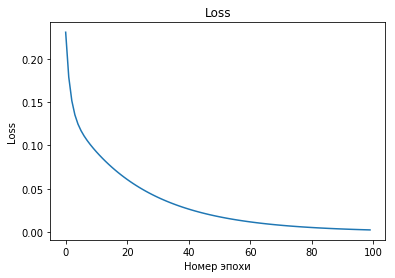

In [21]:
losses = solver.get_loss()

fig, ax = plt.subplots()
plt.plot(losses)
ax.set_xlabel('Номер эпохи')
ax.set_ylabel('Loss')
ax.set_title('Loss')
plt.show()

In [18]:
# Предсказание четности 
def predict_odd_or_even(predictor, xs):
    # выбор режим, для предсказание точности  одного числа или
    # нескольких
    if type(xs) is list:
        X_bin = list(map(int2bin, xs))
    else:
        X_bin = [int2bin(xs)]
    answers = predictor.predict(X_bin)
    # если 0 то четное, если 1 то нечетное,
    # выберем то, до которого ближе
    for answer, x in zip(answers, xs):
        if answer < 0.5:
            print(f"число {x} - четное")
        else:
            print(f"число {x} - нечетное")
    

In [19]:
# Проверим правильность предсказания
predict_odd_or_even(solver, [53, 2, 5])

число 53 - нечетное
число 2 - четное
число 5 - нечетное


In [20]:
# Посмотрим на веса
solver.get_weights()

[array([[ 0.01249338],
        [-0.02268791],
        [-0.05886411],
        [-0.02320227],
        [ 0.09633874],
        [ 0.04883109],
        [-0.01661552],
        [ 0.91286877]])]

Первые 8 весов, это коэфициент перед входным нейроном, а последний это свободный вес смещения.
Как мы видим, коэфициент при 8 бите гораздо больше остальных. 